# Accurately Detecting Trolls in Slashdot Zoo via Decluttering

## Information Reterival
### Project Done by:
#### Padma Sai J (2016A7PS0084P)
#### Purushotham (2016A7PS0025P)
#### Raghavendra (2016A7PSPS0107)

Header files

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import average_precision_score
%matplotlib inline

In [ ]:
# To Get Input from filename

In [3]:
def get_input(filename):
    G=nx.DiGraph()
    G=nx.read_weighted_edgelist(filename,comments="%",nodetype=int)
    return G
G=get_input("./out.matrix")

In [ ]:
# we took given below T as testcase1 mentioned in paper

In [5]:
T=nx.DiGraph()
T.add_nodes_from([1,2,3,4,5,6])
T.add_weighted_edges_from([(1,2,-1),(1,3,1),(1,6,1),(2,3,1),(2,5,-1)])
T.add_weighted_edges_from([(3,1,1),(3,2,1),(3,5,-1),(4,1,1),(4,3,-1)])
T.add_weighted_edges_from([(5,3,-1),(5,4,1),(6,1,-1),(6,2,1),(6,3,-1)])

In [ ]:
# Representation of T mentioned above

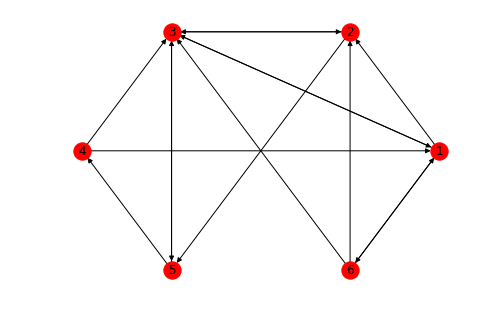

In [13]:
nx.draw_circular(T,with_labels=True)

In [44]:
# centrality Freak score

In [43]:
def Freak_score(G):
    res={}
    for i in G.nodes():
        l=len([(u,v) for (u,v,d) in G.edges(data=True) if d["weight"]==-1 and u==i])
        res[i]=-1*l
    return res


In [ ]:
# centrality FMF score

In [31]:
def FMF_score(G):
    res={}
    for i in G.nodes():
        p=len([(u,v) for (u,v,d) in G.in_edges(i,data=True) if d["weight"]==1])
        n=len([(u,v) for (u,v,d) in G.in_edges(i,data=True) if d["weight"]==-1])
        res[i]=p-n
    return res

In [ ]:
# centrality Prestige score

In [33]:
def Prestige_score(G):
    res={}
    l=FMF_score(G)
    for u in l:
        res[u]=round(l[u]/len(G.in_edges(u)),2)
    return res

In [ ]:
# centrality MPR score

In [35]:
def MPR_score(G):
    res={}
    e1=[(u,v) for (u,v,d) in G.edges(data=True) if d["weight"]==1]
    e2=[(u,v) for (u,v,d) in G.edges(data=True) if d["weight"]==-1]
    h1=G.edge_subgraph(e1)
    h2=G.edge_subgraph(e2)
    p=nx.pagerank(h1,0.85)
    n=nx.pagerank(h2,0.85)
    for i in G.nodes():
        res[i]=round(p[i]-n[i],2)
    return res


In [ ]:

    # centrality SEC score

In [37]:
def SEC_score(G):
    
    res={}
    e1=[(u,v) for (u,v,d) in G.edges(data=True) if d["weight"]==1]
    e2=[(u,v) for (u,v,d) in G.edges(data=True) if d["weight"]==-1]
    h1=G.edge_subgraph(e1)
    
    
    p=nx.eigenvector_centrality(h1)
   
    for i in G.nodes():
        res[i]=round(p[i],2)
    return res    

In [ ]:
# centrality MHits

In [41]:
def M_HITS(G):
    res={}
    h1=G.copy()
    h2=G.copy()
    for i in h1.edges(data=True):
        if i[2]["weight"]==-1:
            i[2]["weight"]=None
    for i in h2.edges(data=True):
        if i[2]["weight"]==1:
            i[2]["weight"]=None
    
    p,a1=nx.hits_numpy(h1)
    n,a2=nx.hits_numpy(h2)
    for i in G.nodes():
        res[i]=a1[i]-a2[i]
    return res

In [ ]:
# decluttering (a)
    

In [45]:
def DOP_a(G,benign):
    for i in benign:
        for j in benign:
            if i!=j:
                if G.has_edge(i,j) and G.has_edge(j,i):
                    if G[i][j]["weight"]==1 and G[j][i]["weight"]==1:
                        G.remove_edge(i,j)
                        G.remove_edge(j,i)
    return G

In [ ]:
# decluttering (b)

In [46]:
def DOP_b(G,benign):
    #print(G)
    for i in benign:
        for j in benign:
            if i!=j:
                #print(i,j)
                if G.has_edge(i,j) and G.has_edge(j,i):
                    if G[i][j]["weight"]==-1 and G[j][i]["weight"]==-1:
                        G.remove_edge(i,j)
                        G.remove_edge(j,i)
    return G

In [ ]:
# decluttering (c)

In [25]:
def DOP_c(G,benign):
    for i in benign:
        for j in benign:
            if i!=j:
                if G.has_edge(i,j) and G.has_edge(j,i):
                    if (G[i][j]["weight"]==-1 and G[j][i]["weight"]==1) or (G[i][j]["weight"]==1 and G[j][i]["weight"]==-1):
                        G.remove_edge(i,j)
                        G.remove_edge(j,i)
    return G

In [ ]:
# decluttering (d)

In [26]:
def DOP_d(G,benign):
    for i in benign:
        for j in benign:
            if i!=j:
                if G.has_edge(i,j) and G.has_edge(j,i):
                    if (G[i][j]["weight"]==-1 and G[j][i]["weight"]==1):                        
                        G.remove_edge(i,j)
                    elif (G[i][j]["weight"]==1 and G[j][i]["weight"]==-1):
                        G.remove_edge(j,i)
    return G

In [ ]:
# decluttering (e)

In [27]:
def DOP_e(G,benign):
    for i in benign:
        for j in benign:
            if i!=j:
                if G.has_edge(i,j) and G.has_edge(j,i):
                    if (G[i][j]["weight"]==-1 and G[j][i]["weight"]==1):                        
                        G.remove_edge(j,i)
                    elif (G[i][j]["weight"]==1 and G[j][i]["weight"]==-1):
                        G.remove_edge(i,j)
    return G

In [ ]:
# TIA (Troll Identifiaction Algorithm) the main function with decluttering using a,b,c

In [51]:
def TIA(G,centrality,cut_off):
    while True:
        G_copy=G.copy()
        C=centrality(G)
        benign=[v for v in G_copy.nodes() if C[v]>=cut_off]
        Malicious = [x for x in G_copy.nodes() if x not in benign]
        G=DOP_c(DOP_b(DOP_a(G_copy,benign),benign),benign)
        em=nx.algorithms.isomorphism.numerical_edge_match('weight', 1)
        if(nx.is_isomorphic(G,G_copy,edge_match=em)):
            break
    return C

In [ ]:
# average precision takes y_true, It is a boolean array of whether node is benign or not
#                    and  y_scores, scores obtained to each node by above algorithm

In [ ]:
def Avg_precision(y_true,y_scores):
    return average_precision_score(y_true, y_scores)

In [ ]:
# checked TIA for a example input T mentioned at the start with centrality Freak score

In [49]:
print("This is the output of graph T and with centrality Freak score")
print(TIA(T,Freak_score,0))

In [ ]:
# checked TIA for a example input T mentioned at the start with centrality FMF score

In [50]:
print("This is the output of graph T and with centrality FMF score")
print(TIA(T,FMF_score,0))

In [ ]:
# checked TIA for a example input T mentioned at the start with centrality Prestige score

In [34]:
print("This is the output of graph T and with centrality Prestige score")
print(TIA(T,Prestige_score,0))

This is the output of graph T and with centrality Prestige score
{1: 0.33, 2: 0.33, 3: -0.2, 4: 1.0, 5: -1.0, 6: 1.0}


In [ ]:
# checked TIA for a example input T mentioned at the start with centrality MPR score

In [54]:
print("This is the output of graph T and with centrality MPR score")
print(TIA(T,MPR_score,0))

In [ ]:
# checked TIA for a example input T mentioned at the start with centrality SEC score

In [53]:
print("This is the output of graph T and with centrality SEC score")
print(TIA(T,SEC_score,0.5))

In [ ]:
# checked TIA for a testcase1 T mentioned at the start with centrality MHITS

In [52]:
print("This is the output of graph T and with centrality  MHITS")
print(TIA(T, M_HITS,0))

In [ ]:
# To run below i.e with dataset mentioned in paper. uncomment the line below and run it on Intel Xeon @ 2.3
# GHz, 24GB RAM Linux machine as mentioned in paper

In [ ]:
#print(TIA(G,Freak_score,0))